<a name = "inicio"></a>
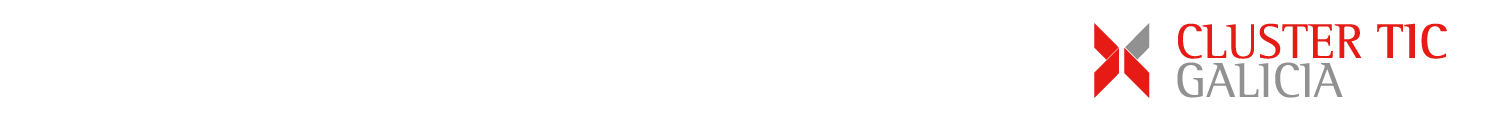

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Gráficos 2D</div>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
generator = np.random.Generator(np.random.PCG64(seed = 0))

Comencemos viendo algunos de los diferentes tipos de gráficos 2D que Matplotlib puede generar.

# Gráficos de líneas

Ya hemos visto cómo crear **gráficos de líneas** usando la función *plt.plot()*, funcionalidad también accesible como [método de un conjunto de ejes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html):

In [3]:
sin = np.sin(np.arange(0, 10, 0.1))
cos = np.cos(np.arange(0, 10, 0.1))

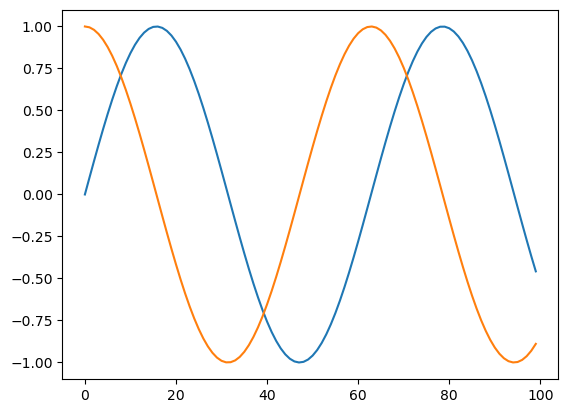

In [4]:
fig, ax = plt.subplots()
ax.plot(sin)
ax.plot(cos)
plt.show()

Los gráficos de líneas se muestran como un conjunto de puntos conectados entre sí mediante líneas. Frecuentemente se usan para representar cómo varía una variable a lo largo del tiempo o a lo largo de otra variable independiente. Este tipo de gráficas nos permite identificar fácilmente los valores máximos y mínimos, pudiendo mostrarse dos o más gráficas superpuestas, como en el ejemplo anterior.

Esta función es, probablemente, la más usada de Matplotlib.

# Gráficos de dispersión

Los **gráficos de dispersión**, también denominados **diagramas de dispersión** o **scatter plots** en la literatura en inglés, se utilizan para comparar los valores que toman dos variables distintas, una de las cuales se representa a lo largo del eje $x$ y la otra a lo largo del eje $y$. La gráfica resultante nos permite identificar visualmente la posible correlación entre las dos variables.

En Mapplotlib, aun cuando es posible crear este tipo de gráficas con la ya conocida función *plt.plot()* (basta ocultar las líneas y mostrar solo los puntos), existe una función mucho más potente: la función [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) (funcionalidad también disponible como [método de un conjunto de ejes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)). Esta función acepta como primeros dos argumentos los valores $x$ e $y$ de los puntos a mostrar. Hagamos un ejemplo sencillo: generemos valores aleatorios extraídos de una distribución normal para los valores de $x$ y de $y$, y crucémoslos en un gráfico de este tipo:

In [5]:
x = generator.standard_normal(100)
y = generator.standard_normal(100)

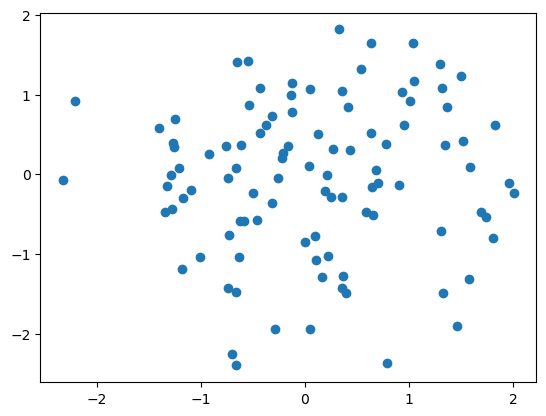

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Más útil resulta este tipo de gráfica cuando estamos visualizando elementos de diferente clase y los mostramos en el gráfico con diferenes colores. Para probar esta función, vamos a trabajar con datos sencillos pero reales: el [conjunto de datos Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) conteniendo el ancho y el largo de los pétalos y sépalos de 150 flores de tres especies de Iris (setosa, versicolor y virginica). Vamos a cargarlo en un dataframe pandas con el siguiente código:

In [7]:
data = sns.load_dataset("iris")

In [8]:
data.shape

(150, 5)

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Confirmamos que se trata de 150 registros y que es en la última columna ("*species*") donde se almacena la especie de la flor.

Crucemos las variables "*sepal_length*" y "*sepal_width*", información que cargaremos en los parámetros **x** e **y**:

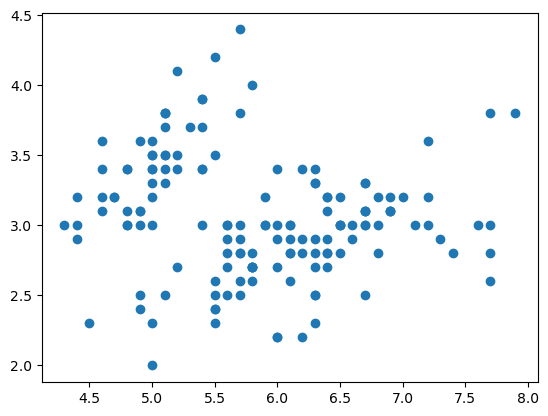

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = data.sepal_length, y = data.sepal_width)
plt.show()

### El parámetro "color"

Podemos aplicar un mismo color a todos los puntos usando el parámetro **color**:

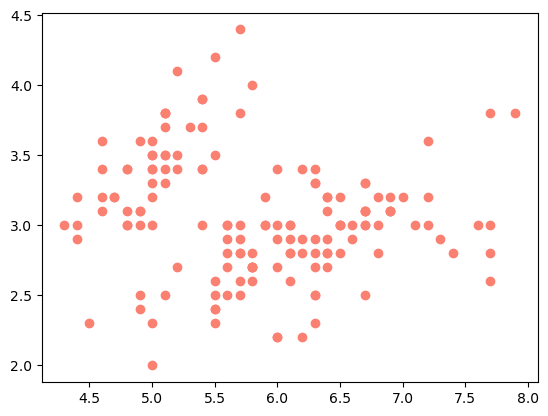

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data.sepal_length, y = data.sepal_width, color = "salmon")
plt.show()

Usando este parámetro, si quisiéramos dar a los puntos un color diferente en función de la especie a la que pertenece cada uno, una primera opción sería crear tres diagramas de dispersión diferentes, aplicando un color distinto a cada uno de ellos:

In [12]:
setosa = data[data.species == "setosa"]
versicolor = data[data.species == "versicolor"]
virginica = data[data.species == "virginica"]

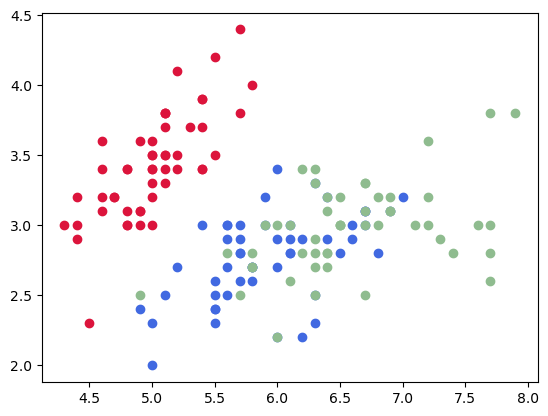

In [13]:
fig, ax = plt.subplots()
ax.scatter(setosa.sepal_length, setosa.sepal_width, color = "Crimson")
ax.scatter(versicolor.sepal_length, versicolor.sepal_width, color = "RoyalBlue")
ax.scatter(virginica.sepal_length, virginica.sepal_width, color = "DarkSeaGreen")
plt.show()

Otra opción sería pasar a este parámetro una estructura con tantos colores como marcas gráficas existan (150, en nuestro ejemplo). Para esto podemos crear un diccionario que asocie un color diferente a cada especie:

In [14]:
colors = {
    "setosa": "Crimson",
    "versicolor": "RoyalBlue",
    "virginica": "DarkSeaGreen"
}
species_color = data.species.map(colors)

In [15]:
species_color

0           Crimson
1           Crimson
2           Crimson
3           Crimson
4           Crimson
           ...     
145    DarkSeaGreen
146    DarkSeaGreen
147    DarkSeaGreen
148    DarkSeaGreen
149    DarkSeaGreen
Name: species, Length: 150, dtype: object

La grafica quedaría así:

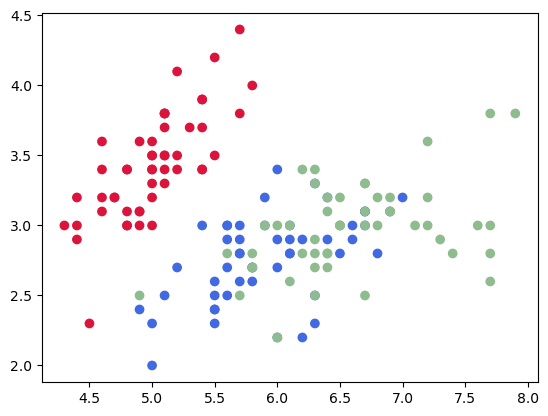

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = data.sepal_length, y = data.sepal_width, color = species_color)
plt.show()

### El parámetro "c"

Este parámetro sirve para asignar a cada punto un color diferente en función de un valor numérico. Es decir, tendríamos que pasar a este parámetro una estructura con 150 valores numéricos (0, 1 y 2, por ejemplo), y Matplotlib aplicaría un mapa de color para "mapear" cada valor a un color.

Una forma rápida de convertir una serie pandas como la columna *species* en una estructura de valores numéricos es convertir la serie a tipo categórico y extraer los códigos asignados internamente por pandas:

In [17]:
data.species.astype("category").cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

Es decir:

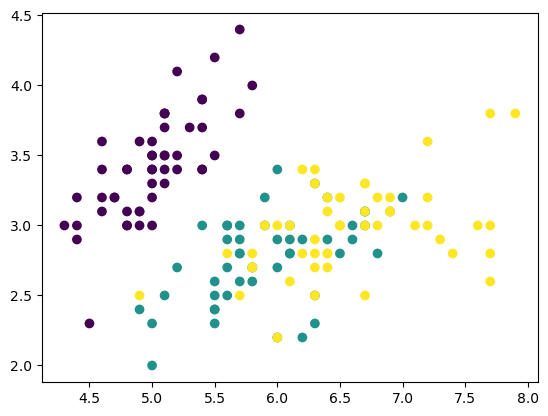

In [18]:
fig, ax = plt.subplots()
ax.scatter(
    x = data.sepal_length,
    y = data.sepal_width,
    c = data.species.astype("category").cat.codes
)
plt.show()

Comprobamos que Matplotlib ha aplicado un mapa de color de entre los que hay disponibles, mapa de color que podemos modificar especificando nosotros el que deseamos:

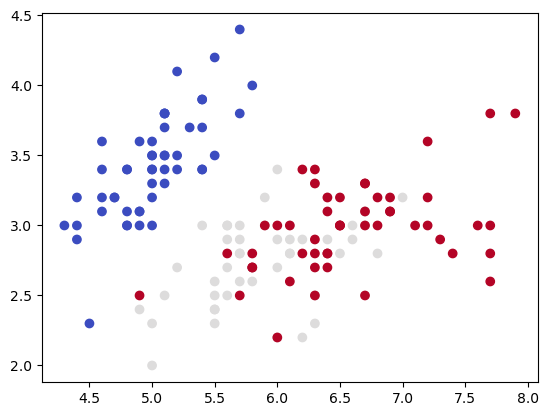

In [19]:
fig, ax = plt.subplots()
ax.scatter(
    x = data.sepal_length,
    y = data.sepal_width,
    c = data.species.astype("category").cat.codes,
    cmap = "coolwarm"
)
plt.show()

La opción más potente es crear nuestro propio mapa de color, lo que ya hemos visto que podemos hacer con la función **ListedColormap**:

In [20]:
colormap = mpl.colors.ListedColormap(["Crimson", "RoyalBlue", "DarkSeaGreen"])

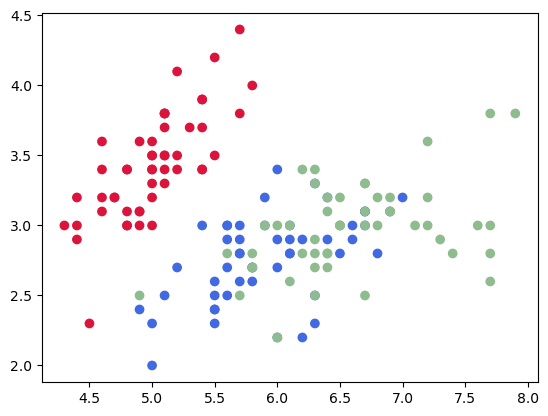

In [21]:
fig, ax = plt.subplots()
ax.scatter(
    x = data.sepal_length,
    y = data.sepal_width,
    c = data.species.astype("category").cat.codes,
    cmap = colormap
)
plt.show()

### Leyendas

Si queremos añadir una leyenda nos encontramos con un pequeño problema pues recordemos que la leyenda toma las etiquetas de las diferentes gráficas que se incluyesen en los ejes: si incluíamos tres gráficas (cada una con sus datos), asignábamos a cada una una etiqueta, y era esta etiqueta la mostrada en la leyenda. Esto, trasladado a nuestro ejemplo, significa que si quisiéramos que la leyenda distinguiera entre '*setosa*', '*versicolor*' y '*virginica*', tendríamos que crear tres gráficos de dispersión, tal y como hemos hecho previamente, uno para cada tipo de flor, y dar a cada uno una etiqueta diferente. Y solo entonces podríamos mostrar la leyenda. Aun cuando resulta un poco más complejo de lo que cabría esperar, podemos hacerlo sin mayor problema. Por ejemplo:

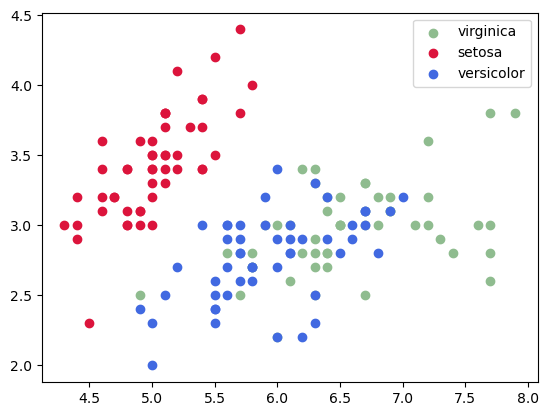

In [22]:
fig, ax = plt.subplots()
for species in set(data.species):
    ax.scatter(
        data.sepal_length[data.species == species],
        data.sepal_width[data.species == species],
        c = colors[species],
        label = species
    )
plt.legend()
plt.show()

Como vemos, tras crear la figura y el conjunto de ejes, recorremos en bucle los tipos de especies y, para cada uno, añadimos un diagrama de dispersión al que pasamos los datos del dataframe *data* que se corresponden solo con la especie que estemos considerando. En este ejemplo se ha usado el mismo diccionario que teníamos para extraer el color a asignar a cada diagrama de dispersión.

Otra alternativa -no especialmente sencilla de usar, pero la más potente- es recurrir al parámetro *handles* de la función *plt.legend()*, que nos permite definir las etiquetas y asignaciones de forma personalizada:

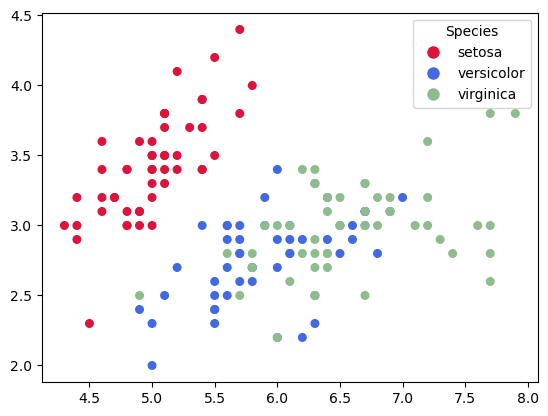

In [23]:
plt.scatter(x = data.sepal_length, y = data.sepal_width, c = data.species.astype("category").cat.codes, cmap = colormap, s = 30)

legend_labels = [
    plt.Line2D(
        xdata = [],
        ydata = [],
        marker = 'o',
        color = 'w',
        label = category,
        markerfacecolor = colormap(i),
        markersize = 10
    )
    for i, category in enumerate(data['species'].unique())
]

plt.legend(handles = legend_labels, title = 'Species')
plt.show()

# Histogramas

Matplotlib ofrece funciones para la representación de **histogramas** de una y de dos variables. Veámoslas por separado:

### Histogramas de una variable

Un **histograma** es una representación de una variable utilizando barras verticales en la que la altura de cada barra es proporcional a la frecuencia de los valores representados. Este tipo de gráfica nos permite saber rápidamente cuál es la distribución de los datos respecto a una característica.

La función [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) es la encargada de crear histogramas (funcionalidad [también disponible como método](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) de un conjunto de ejes). La función recibe como primer argumento el conjunto de datos, en forma de array o tipo semejante. Hagamos un ejemplo sencillo:

In [24]:
y = generator.standard_normal(10000)

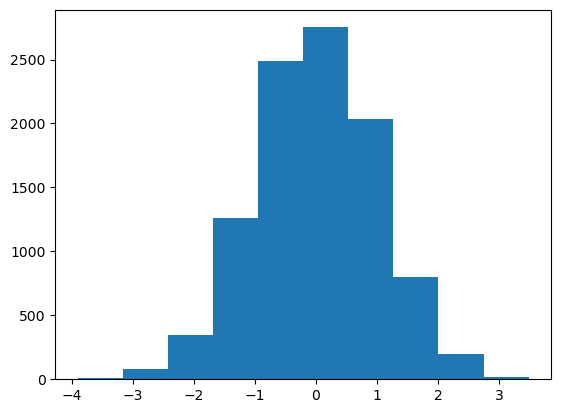

In [25]:
fig, ax = plt.subplots()
ax.hist(y)
plt.show()

Hemos generado 10.000 números aleatorios extraídos de una distribución normal de media 0 y desviación estándar 1, y los hemos pasado a la función, mostrándose las barras con una altura proporcional al número de elementos representados en cada barra. Así, vemos que éstas representan valores entre 0 y 1, entre 1 y 2, entre 2 y 3, etc. Comprobamos también que la barra más alta (la correspondiente a los valores entre 0 y 1) llega hasta el valor (aproximado) de 2.800, lo que significa que, de los 10.000 números, hay unos 2.800 entre dichos valores.

##### Resultado devuelto por la función

La función (y el método) *hist()* devuelve tres valores. Volvamos a crear el histograma anterior recogiendo los valores devueltos por el método *.hist()* en una variable $h$:

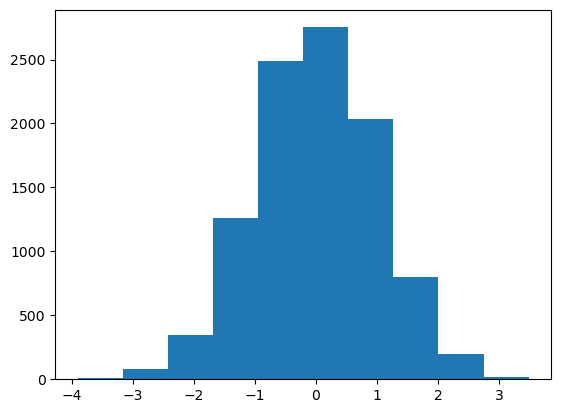

In [26]:
fig, ax = plt.subplots()
h = ax.hist(y)
plt.show()

In [27]:
h

(array([  10.,   79.,  348., 1262., 2490., 2752., 2037.,  801.,  201.,
          20.]),
 array([-3.89942173, -3.16129583, -2.42316994, -1.68504404, -0.94691814,
        -0.20879225,  0.52933365,  1.26745955,  2.00558544,  2.74371134,
         3.48183724]),
 <BarContainer object of 10 artists>)

Comprobamos que, efectivamente, h contiene tres valores:

* El primero es un array con los valores de las barras o *bins* -como se llaman en la literatura en inglés- (la altura de cada uno).
* El segundo valor es un array que contiene los límites de cada bin.
* Por último, el tercer valor es una lista de objetos gráficos que representan los bins. El tener acceso a los objetos gráficos que forman la gráfica (en este caso, [objetos rectángulo](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)) nos permite incluso darles formato individual, por ejemplo:

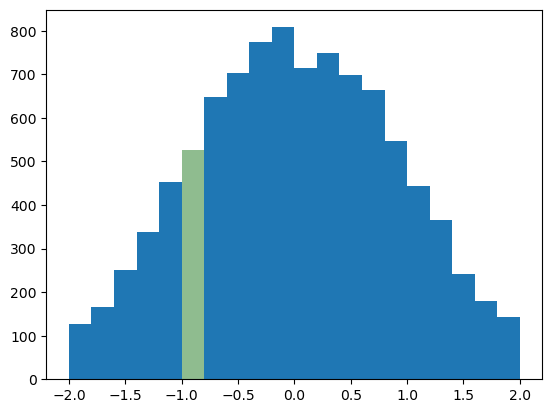

In [28]:
fig, ax = plt.subplots()
h = ax.hist(y, bins = 20, range = (-2, 2))
h[2][5].set_facecolor("DarkSeaGreen")
plt.show()

##### bins

En el ejemplo anterior se han creado 10 barras (10 bins). Pero podemos controlar el número de bins con el parámetro homónimo:

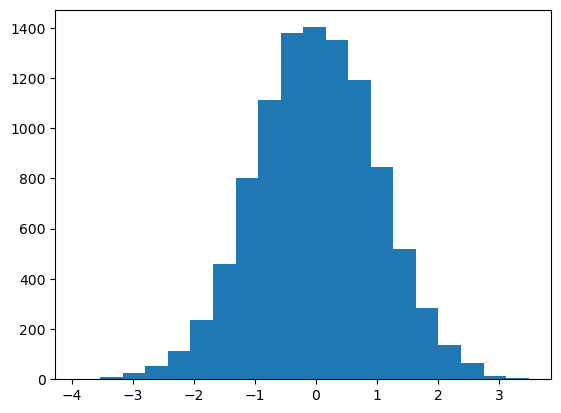

In [29]:
fig, ax = plt.subplots()
ax.hist(y, bins = 20)
plt.show()

En la imagen anterior, hemos creado 20 bins. Ahora, la barra más alta llega hasta 1.400, aproximadamente (por cada barra del histograma anterior ahora tenemos dos).

##### range

Otro de los parámetros aceptados por la función es **range**. Este parámetro controla los valores mínimos y máximos a considerar en el histograma. Por ejemplo, si repetimos el histograma anterior especificando que el valor mínimo sea -2 y el máximo sea 2, el resultado es el mostrado en la siguiente imagen:

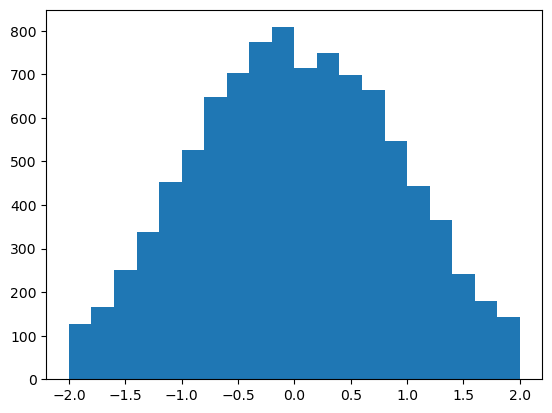

In [30]:
fig, ax = plt.subplots()
h = ax.hist(y, bins = 20, range = (-2, 2))
plt.show()

En este caso, los datos incluidos se repartirán entre el número de bins que se creen (es decir, si hemos especificado 20 bins, se van a crear 20 bins tanto si incluimos todos los datos como si solo consideramos un rango).

##### density

Este parámetro, que puede tomar los valores *True*, *False* o *None* (valor por defecto), determina si los valores (alturas) de cada bin se normalizan para formar una función de densidad de probabilidad o no. Hagamos la prueba para los mismos datos con los que estamos trabajando:

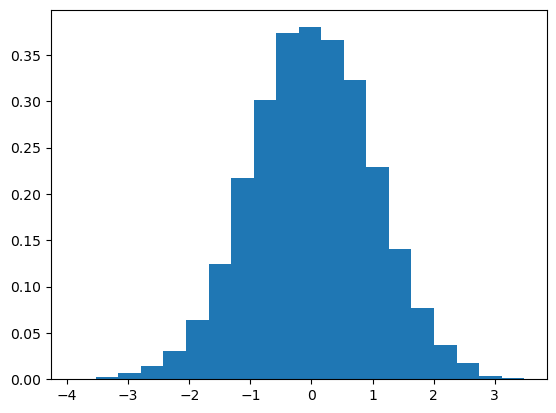

In [31]:
fig, ax = plt.subplots()
v, l, g = ax.hist(y, bins = 20, density = True)
plt.show()

In [32]:
v

array([0.00054191, 0.00216765, 0.00677391, 0.01463165, 0.03034713,
       0.06394573, 0.12491094, 0.21703615, 0.30103266, 0.373649  ,
       0.37988099, 0.36579126, 0.32298013, 0.22895823, 0.1400845 ,
       0.07695164, 0.03712104, 0.01734122, 0.00406435, 0.00135478])

El código usado en la imagen anterior es semejante al usado en los ejemplos anteriores con la adición del parámetro **density**. Y vemos, para empezar, que los bins ya no toman valores en el rango [0, 2.800] como ocurría en la primera versión del histograma que creamos, sino en el rango normalizado [0, 1] (en realidad, solo se muestran valores en el rango [0, 0.40] pues no hay valores por encima de esa cifra en este caso concreto y Matplotlib evita mostrar ese espacio vacío). Además, de los tres valores devueltos por la función -que en este caso hemos extraído en tres variables distintas -$v$, $l$ y $g$-, el primero de ellos -que hemos visto que devuelve la altura de los bins- toma los valores también normalizados.

##### cumulative

Este parámetro, que también toma un valor booleano, determina si el histograma es construido de forma que cada bin incluya sus valores y los anteriores (o no):

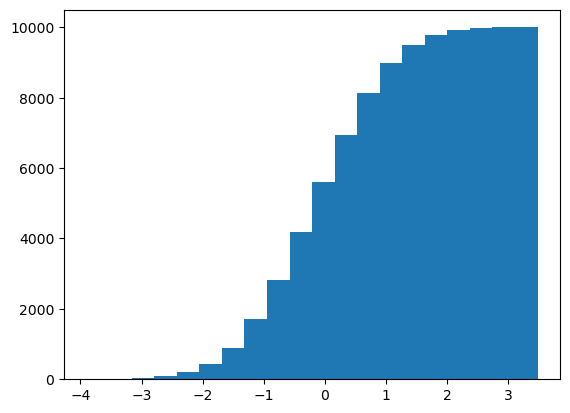

array([2.000e+00, 1.000e+01, 3.500e+01, 8.900e+01, 2.010e+02, 4.370e+02,
       8.980e+02, 1.699e+03, 2.810e+03, 4.189e+03, 5.591e+03, 6.941e+03,
       8.133e+03, 8.978e+03, 9.495e+03, 9.779e+03, 9.916e+03, 9.980e+03,
       9.995e+03, 1.000e+04])

In [33]:
fig, ax = plt.subplots()
v, l, g = ax.hist(y, bins = 20, cumulative = True)
plt.show()
v

Vemos en el resultado obtenido el número de valores en cada uno de los bins (en el último bin se incluyen los 10 mil valores).

Podemos combinar este parámetro con **density** para crear una función de densidad de probabilidad acumulada:

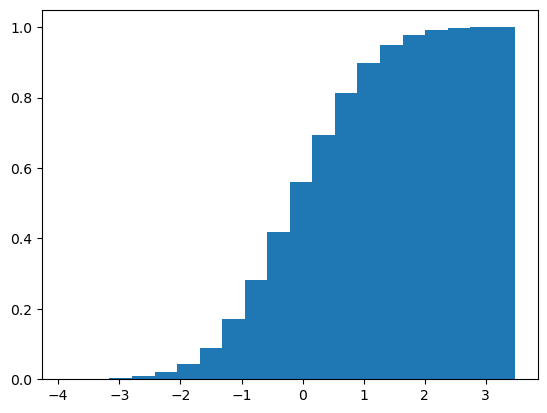

array([2.000e-04, 1.000e-03, 3.500e-03, 8.900e-03, 2.010e-02, 4.370e-02,
       8.980e-02, 1.699e-01, 2.810e-01, 4.189e-01, 5.591e-01, 6.941e-01,
       8.133e-01, 8.978e-01, 9.495e-01, 9.779e-01, 9.916e-01, 9.980e-01,
       9.995e-01, 1.000e+00])

In [34]:
fig, ax = plt.subplots()
v, l, g = ax.hist(y, bins = 20, cumulative = True, density = True)
plt.show()
v

De hecho, si el parámetro **cumulative** toma el valor -1, el histograma se construye al revés: el primer bin toma el valor 1 y a los siguiente se les va restando los valores de aquellos que los preceden:

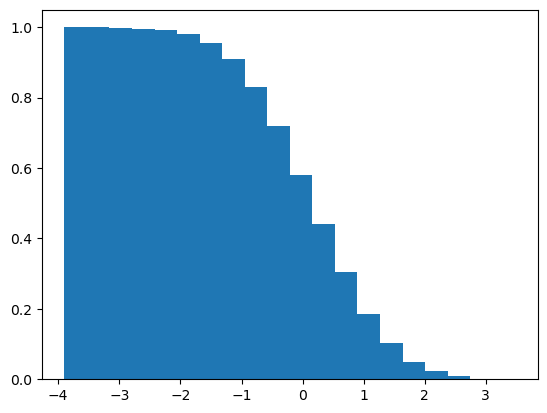

array([1.000e+00, 9.998e-01, 9.990e-01, 9.965e-01, 9.911e-01, 9.799e-01,
       9.563e-01, 9.102e-01, 8.301e-01, 7.190e-01, 5.811e-01, 4.409e-01,
       3.059e-01, 1.867e-01, 1.022e-01, 5.050e-02, 2.210e-02, 8.400e-03,
       2.000e-03, 5.000e-04])

In [35]:
fig, ax = plt.subplots()
v, l, g = ax.hist(y, bins = 20, cumulative = -1, density = True)
plt.show()
v

##### orientation

También podemos mostrar el histograma en posición vertical (posición por defecto que hemos visto en todos los ejemplos hasta ahora) o en posición horizontal. Para ello tenemos el parámetro **orientation** que puede tomar los valores '*horizontal*' o '*vertical*':

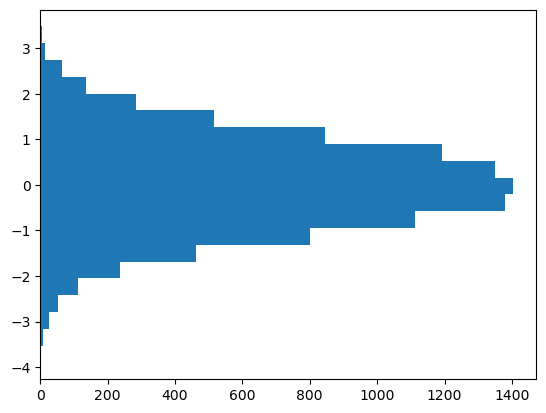

In [36]:
fig, ax = plt.subplots()
ax.hist(y, bins = 20, orientation = "horizontal")
plt.show()

##### color

El último parámetro que vamos a destacar de los histogramas es **color**, que determina el color a usar al mostrar las barras:

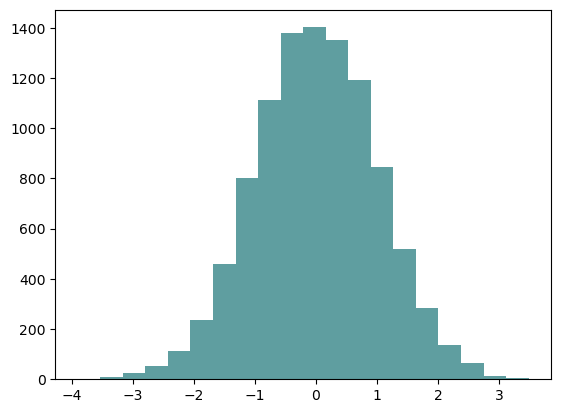

In [37]:
fig, ax = plt.subplots()
ax.hist(y, bins = 20, color = "CadetBlue")
plt.show()

##### Etiquetas de barras

La función (y el método) *hist* no dispone de una forma sencilla para mostrar los valores de los bins, cosa que, frecuentemente, resulta extremadamente conveniente. Pero podemos conseguirlo de la siguiente forma: ya hemos visto que, de los tres valores devueltos por la función *hist*, el tercero es una lista con referencias a los objetos gráficos que forman la gráfica (en el caso del histograma dichos elementos son [objetos rectágulo](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)). Si buceamos un poco por la página con la documentación veremos que estos objetos disponen de varios métodos que devuelven su posición y dimensiones: **get_height**, **get_width**, **get_xy**, **get_x** y **get_y**, por ejemplo, de forma que podemos mostrar los valores de los bins (que devuelve la función) en una posición relativa a la posición del rectángulo con la función ya vista [matplotlib.pyplot.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html). El código sería el siguiente:

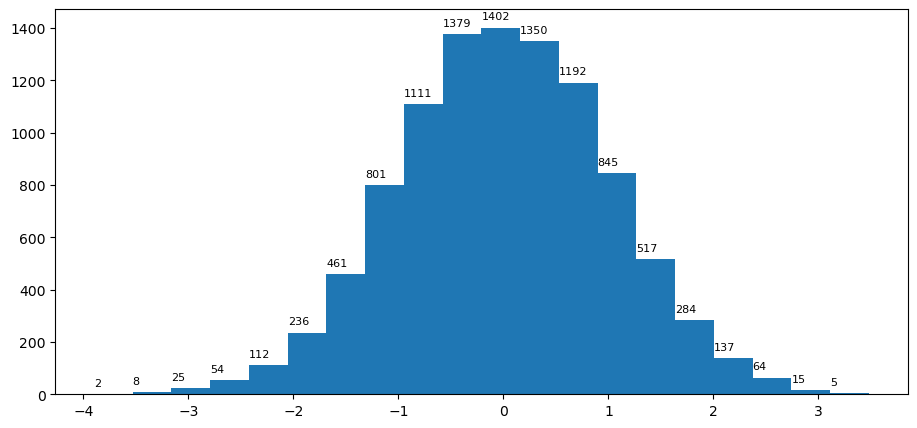

In [38]:
fig, ax = plt.subplots(figsize = (11, 5))
v, m, g = ax.hist(y, bins = 20)
for i, rect in enumerate(g):
    posx = rect.get_x()
    posy = rect.get_height()
    ax.text(posx, posy + 30, int(v[i]), color='black', fontsize = 8)
plt.show()

Tras crear el histograma y recoger el resultado en las variables $v$, $m$ y $g$, recorremos con un bucle *for* cada uno de los rectángulos referenciados en $g$. Para cada uno de ellos extraemos su posición $x$ y su altura (que será aproximadamente la posición $y$ del texto a mostrar) utilizando los métodos *.get_x()* y *.get_height()*. Por último, mostramos el valor del bin (contenido en $v[i]$) en la posición $(posx, posy)$ tras ajustar estos valores un poco (este ajuste se hace a mano para que los valores queden más o menos centrados y algo por encima del borde superior del bin, pero podrían haberse mostrado por debajo, por ejemplo). El valor $v[i]$ se convierte a número entero para evitar mostrar decimales que, en este caso, no aportarían mucho y ocuparían espacio de forma innecesaria.

### Histogramas de dos variables

Para probar los **histogramas de dos variables** -también llamados **histogramas bivariados**- vamos a descargar un dataframe conteniendo información sobre propinas dejadas en un restaurante por los comensales. Este dataframe es proveído por la librería Seaborn:

In [39]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


De las características que ofrece vamos a trabajar con "*total_bill*" (coste total de la comida) y "*tip*" (propina dejada):

In [40]:
x = tips.total_bill
y = tips.tip

Echemos un vistazo a la distribución de estas características mostrando su diagrama de dispersión:

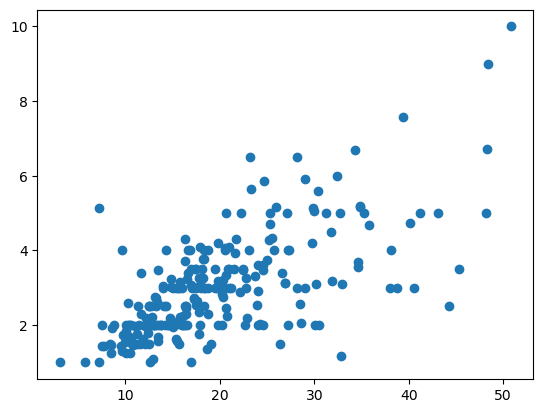

In [41]:
plt.scatter(x, y);

Podemos ver cómo la mayor parte de los puntos definidos por ambas características se concentran en el cuadrante inferior izquierda.

El histograma de dos variables, [matplotlib.pyplot.hist2d](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html), divide el plano en diferentes áreas rectangulares, y considera el número de puntos por área, mostrando cada una con un color diferente en función del número calculado:

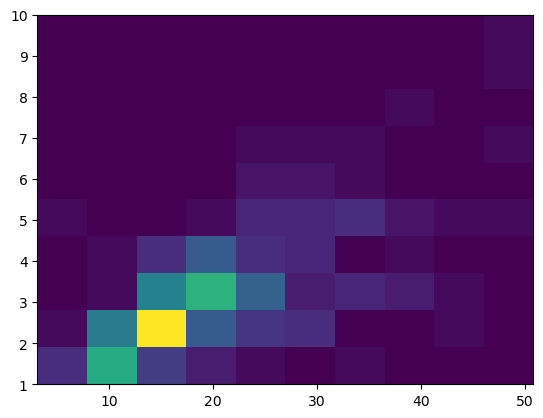

In [42]:
plt.hist2d(x, y)
plt.show()

El área mostrada en amarillo es la correspondiente al área del diagrama de dispersión con mayor número de puntos. Es posible añadir una barra de colores que ayude a la interpretación utilizando la función [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html):

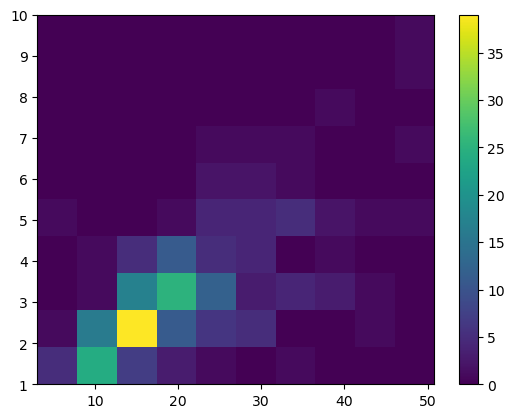

In [43]:
plt.hist2d(x, y);
plt.colorbar()
plt.show()

También es posible modificar el número de áreas en las que dividir el plano utilizando el parámetro **bins**. Si éste es un número, se dividirá tanto el eje $x$ como el eje $y$ en tantos bloques como indique. Si se trata de un array de dos elementos o estructura semejante, el primer número hará referencia al número de bloques en los que dividir el eje vertical, y el segundo al número de bloques en los que dividir el eje horizontal.

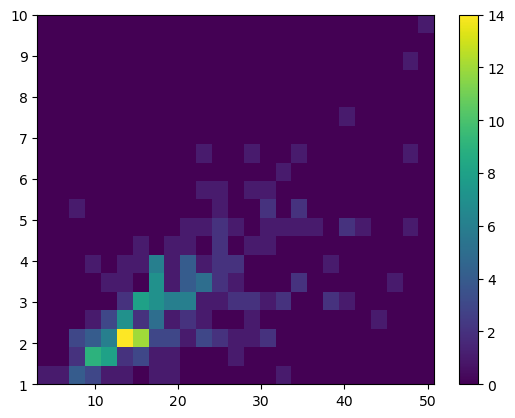

In [44]:
plt.hist2d(x, y, bins = (25, 20));
plt.colorbar();

# Gráficos circulares

El **gráfico circular**, también llamado **gráfico de tarta** o, en inglés, **pie chart**, es adecuado para mostrar proporciones en un conjunto, y es especialmente aconsejable cuando el número de sectores (de valores a mostrar) no es demasiado elevado pues, de otra forma, los sectores del gráfico resultan más difíciles de apreciar.

La función que nos permite mostrar un gráfico circular es [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html), existiendo también un método del conjunto de ejes, [matplotlib.axes.Axes.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html), con la misma funcionalidad.

En su forma más simple, la función recibe como único argumento una lista con el valor de cada sector:

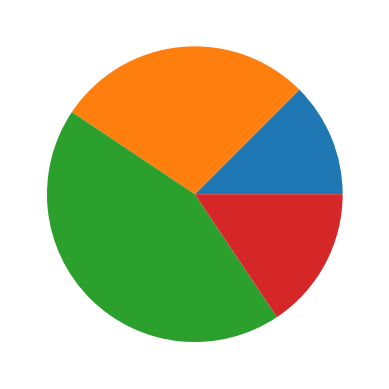

In [45]:
data = [4, 9, 14, 5]
fig, ax = plt.subplots()
g = ax.pie(data)
plt.show()

Podemos pasar los nombres a mostrar en cada sector con el parámetro **label**. El parámetro **colors** nos permite especificar el color de cada uno de los sectores y el parámetro **shadow** controla si mostramos o no una sombra:

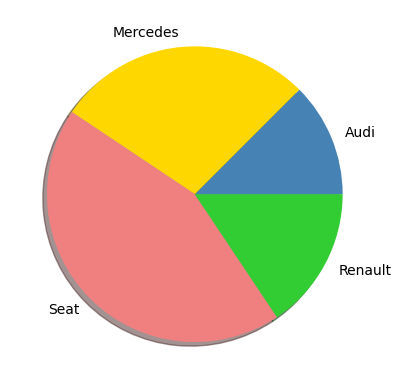

In [46]:
data = [4, 9, 14, 5]
cars = ["Audi", "Mercedes", "Seat", "Renault"]
fig, ax = plt.subplots()
g = ax.pie(
    data,
    labels = cars,
    colors = ["SteelBlue", "Gold", "LightCoral", "LimeGreen"],
    shadow = True
)
plt.show()

La distancia de las etiquetas al centro del gráfico se controla mediante el parámetro **labeldistance** y se mide en radios. Es decir, asignando un valor de 1 provocaríamos que las etiquetas se mostrasen exactamente sobre la circunferencia.

Es posible separar uno o varios de los sectores con el parámetro **explode**: éste recibe una tupla o una lista con tantos valores como sectores haya. Cada valor representa la distancia del sector al centro del gráfico medida en radios. Esto significa que una distancia 0 supone que el sector en cuestión está en su posición inicial junto a los demás. Una distancia mayor significa que dicho sector se separa del centro. En el siguiente ejemplo pasamos al parámetro *explode* la tupla (0.2, 0, 0, 0). El primer valor es el correspondiente a "Audi", por lo que su sector se separará un quinto de radio (0.2):

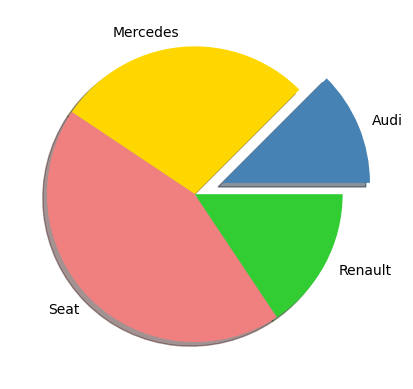

In [47]:
data = [4, 9, 14, 5]
cars = ["Audi", "Mercedes", "Seat", "Renault"]
fig, ax = plt.subplots()
g = ax.pie(
    data,
    labels = cars,
    labeldistance = 1.1,
    colors = ["SteelBlue", "Gold", "LightCoral", "LimeGreen"],
    shadow = True,
    explode = (0.2, 0, 0, 0)
)
plt.show()

Por último, podemos mostrar los porcentajes representados por cada sector utilizando el parámetro **autopct**. Éste toma, por defecto, el valor *None*, pero si le asignamos una cadena de texto que defina un formato, o si le asignamos una función, se mostrará el valor correspondiente. El parámetro **pctdistance** controla la distancia del número mostrado al centro del gráfico, nuevamente en radios. El valor por defecto es 0.6:

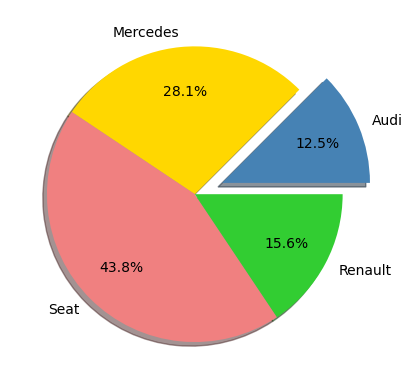

In [48]:
data = [4, 9, 14, 5]
cars = ["Audi", "Mercedes", "Seat", "Renault"]
fig, ax = plt.subplots()
g = ax.pie(
    data,
    labels = cars,
    labeldistance = 1.1,
    colors = ["SteelBlue", "Gold", "LightCoral", "LimeGreen"],
    shadow = True,
    explode = (0.2, 0, 0, 0),
    autopct = '%1.1f%%',
    pctdistance = 0.7
)
plt.show()

# Gráficos de barras

El **gráfico de barras** es útil para comparar valores de categorías con respecto a un total y, segmentando las barras, ver cómo estas categorías se comportan según este segundo criterio de segmentación.

Matplotlib hace muy fácil la creación de este tipo de barras con la función [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) (o el [método asociado](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)). Este gráfico requiere al menos dos argumentos: el primero conteniendo las coordenadas $x$ de las barras, y el segundo conteniendo las alturas de las barras. Por ejemplo:

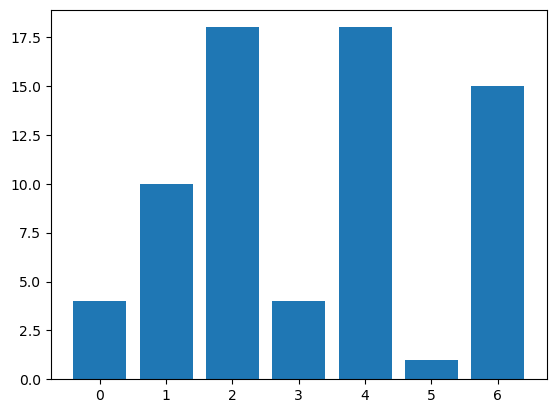

In [49]:
x = np.arange(7)
y = np.random.randint(1, 20, 7)
fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

Es posible indicar una coordenada $y$ para la base de una columna utilizando el parámetro **bottom**. Esto nos permite mostrar una gráfica de barras apiladas utilizando el mismo conjunto de $x$ generando varias gráficas en el mismo conjunto de ejes, cada una teniendo como inicio (*bottom*) la suma de las anteriores:

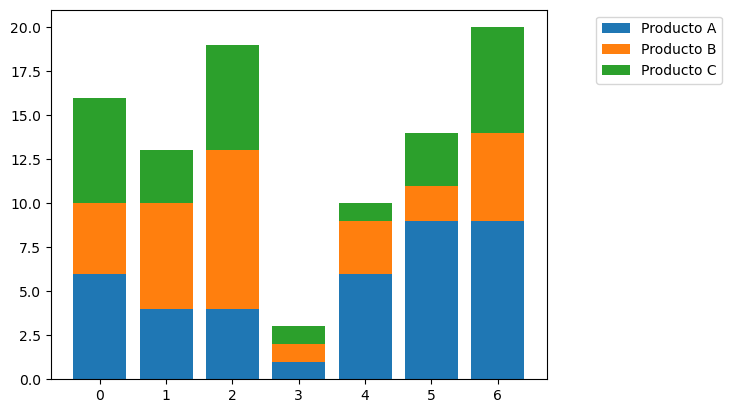

In [50]:
x = np.arange(7)
y1 = np.random.randint(1, 10, 7)
y2 = np.random.randint(1, 10, 7)
y3 = np.random.randint(1, 10, 7)
fig, ax = plt.subplots()
ax.bar(x, y1, label = "Producto A")
ax.bar(x, y2, bottom = y1, label = "Producto B")
ax.bar(x, y3, bottom = y1 + y2, label = "Producto C")
ax.legend(loc = (1.1, 0.8))
plt.show()

En el código anterior, las barras de la primera gráfica (las correspondiente al producto A, azules) tienen como base el valor 0 (valor por defecto), por lo que se muestran pegadas al eje $x$. Las barras de la segunda gráfica (las correspondientes al producto B, verdes) tiene como valor base los valores de las primeras barras (*bottom = y1*), por lo que se muestran a continuación. Y lo mismo sucede con las barras de la tercera gráfica, que tienen como base la suma de $y1$ e $y2$.

Otro de los parámetros disponibles es **width**, que controla el ancho de las barras, permitiéndonos jugar con su apariencia:

In [51]:
y = np.random.randint(1, 20, 7)

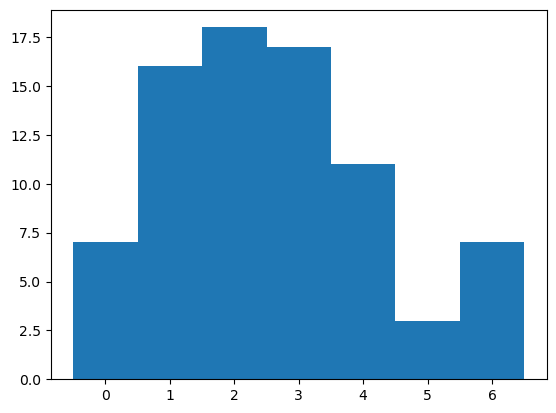

In [52]:
x = np.arange(7)
fig, ax = plt.subplots()
ax.bar(x, y, width = 1.0)
plt.show()

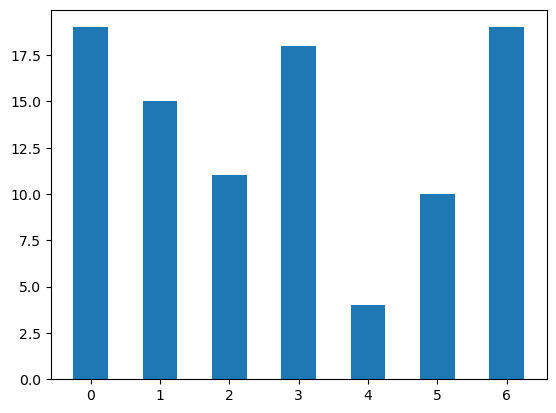

In [53]:
x = np.arange(7)
y = np.random.randint(1, 20, 7)
fig, ax = plt.subplots()
ax.bar(x, y, width = 0.5)
plt.show()

# Gráficos de barras horizontales

La función [matplotlib.pyplot.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) (y su [método equivalente](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html)) es la que nos permite crear este tipo de gráficas. Sus parámetros son equivalentes a los de la función *plt.bar()*, intercambiando los parámetros **x** e **y**, básicamente: 

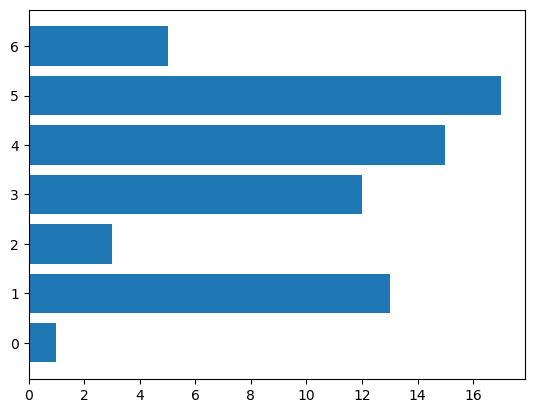

In [54]:
y = np.arange(7)
x = np.random.randint(1, 20, 7)
fig, ax = plt.subplots()
ax.barh(y, x)
plt.show()

También podemos mostrar gráficos de barras apiladas, aunque ahora el parámetro que indica la posición $x$ inicial de las barras es **left**, no *bottom*:

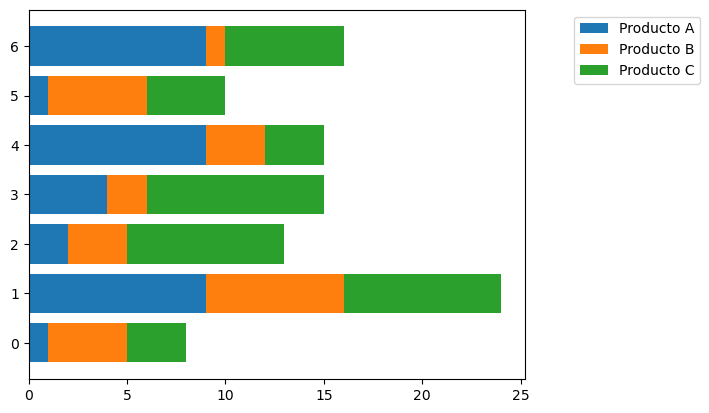

In [55]:
y = np.arange(7)
x1 = np.random.randint(1, 10, 7)
x2 = np.random.randint(1, 10, 7)
x3 = np.random.randint(1, 10, 7)
fig, ax = plt.subplots()
ax.barh(y, x1, label = "Producto A")
ax.barh(y, x2, left = x1, label = "Producto B")
ax.barh(y, x3, left = x1 + x2, label = "Producto C")
ax.legend(loc = (1.1, 0.8))
plt.show()

Y también podemos controlar el ancho de las líneas, aunque aquí el parámetro se llama **height**, lógicamente:

In [56]:
x = np.random.randint(1, 20, 7)

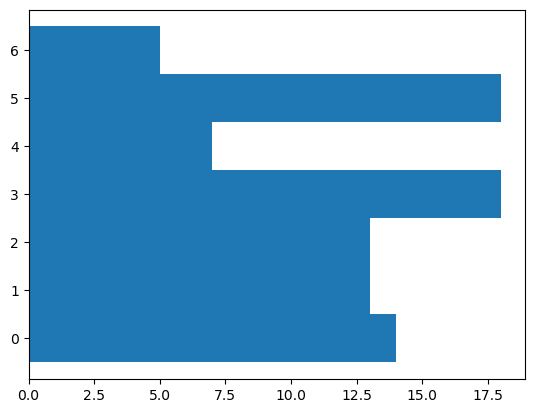

In [57]:
y = np.arange(7)
fig, ax = plt.subplots()
ax.barh(y, x, height = 1)
plt.show()

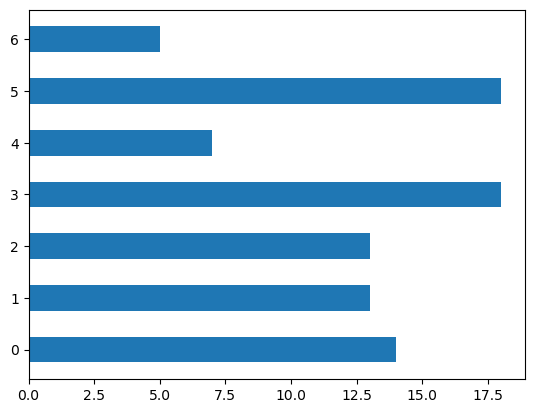

In [58]:
y = np.arange(7)
fig, ax = plt.subplots()
ax.barh(y, x, height = 0.5)
plt.show()

# Gráficos de líneas con barras de error

La función [matplotlib.pyplot.errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) (y el [método de un conjunto de ejes equivalente](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html)) nos permite mostrar una gráfica de líneas a partir de un conjunto de puntos dados por sus posiciones $x$ e $y$, añadiendo una barra de error a cada uno de los puntos. Por ejemplo, si suponemos que el error asociado a cada valor $y$ es un 1 punto:

In [59]:
x = np.linspace(0, 100, 25)
y = generator.standard_normal(25).cumsum()

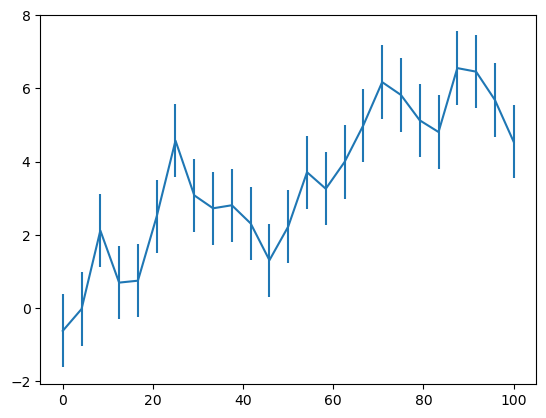

In [60]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr = 1)
plt.show()

La gráfica muestra una línea vertical de longitud dos veces el error indicado.

Algunos parámetros destacables:

* **ecolor**: Define el color de las barras de error
* **elinewidth**: Define el ancho de las barras de error
* **capsize**: Define el ancho de los topes que limitan cada barra de error

En el ejemplo visto, el error es fijo, lo que no siempre es cierto. En el próximo ejemplo suponemos que el error es un 25% del valor $y$ de cada punto más 0.5. Además, se da formato a las barras de error con los parámetros vistos:

In [61]:
y_error = y * 0.25 + 0.5              # Error asociado a cada punto

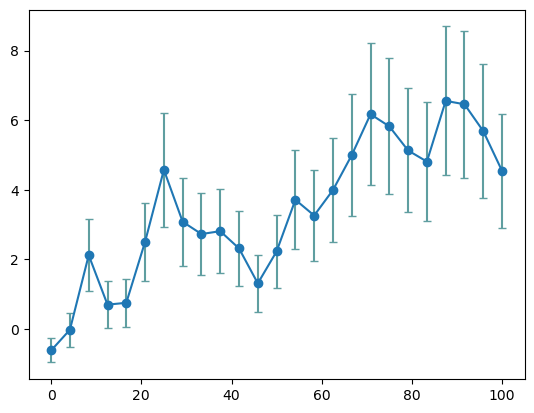

In [62]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr = y_error,
            marker = "o",
            ecolor = "CadetBlue",
            capsize = 3)
plt.show()

# Curvas de nivel

La función [matplotlib.contour](https://matplotlib.org/stable/api/contour_api.html) (o su [método equivalente](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html)) nos permite mostrar en una gráfica **curvas de nivel** de una forma muy sencilla. Los valores a pasar como argumentos son arrays bidimensionales con los valores $x$ e $y$ de los puntos (obtenidos con la función [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)) y un array, de las mismas dimensiones que $x$ e $y$, con los valores en el eje $z$ a representar. Veámoslo en la práctica:

Definimos, en primer lugar, la función que definirá el valor $z$ para cada par de puntos $x$ e $y$. A continuación, creamos las matrices $X$ e $Y$ y generamos los valores $Z$ correspondientes:

In [63]:
def f(x, y):
    return np.sin(x) ** 2 + np.cos(5 + x * y) + 2 * np.cos(x)
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

A continuación basta ejecutar la función *plt.contour()* con los valores $X$, $Y$ y $Z$ calculados:

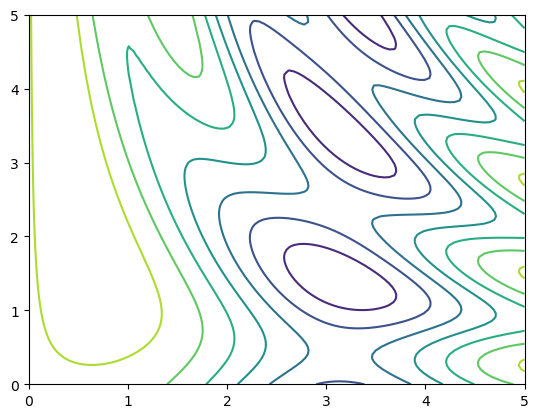

In [64]:
plt.contour(X, Y, Z)
plt.show()

Esta función acepta otros parámetros:

El parámetro **levels** determina el número de curvas a mostrar:

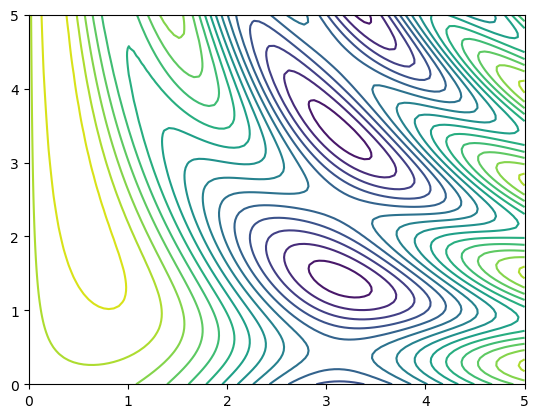

In [65]:
plt.contour(X, Y, Z, levels = 15)
plt.show()

**alpha** especifica el grado de transparencia de las curvas, y **cmap** el mapa de color a usar:

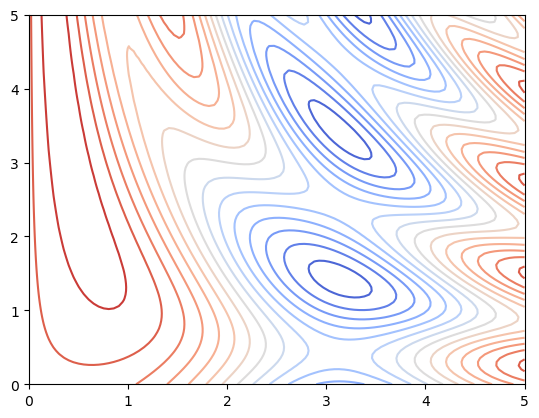

In [66]:
plt.contour(X, Y, Z, levels = 15, cmap = "coolwarm")
plt.show()

El parámetro **linewidths** controla el ancho de los contornos, y **linestyles** el estilo: "*solid*", "*dashed*", "*dashdot*" o "*dotted*":

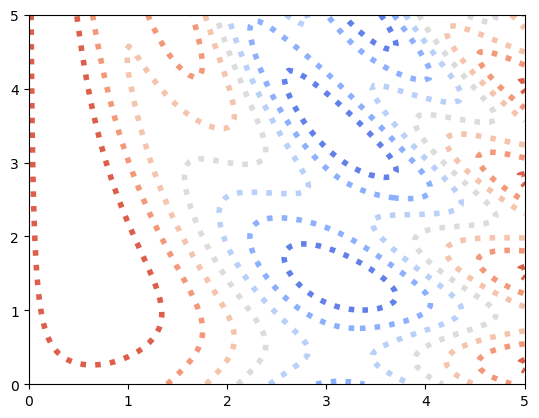

In [67]:
plt.contour(X, Y, Z,
            cmap = "coolwarm",
            linewidths = 4,
            linestyles = "dotted")
plt.show()

# Curvas de nivel rellenas

La función [matplotlib.pyplot.contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) (o el [método asociado](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contourf.html)) tiene un comportamiento semejante al de la función *plt.contour()* vista, pero rellenando las áreas entre líneas. Repitamos el mismo ejemplo:

In [68]:
def f(x, y):
    return np.sin(x) ** 2 + np.cos(5 + x * y) + 2 * np.cos(x)
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

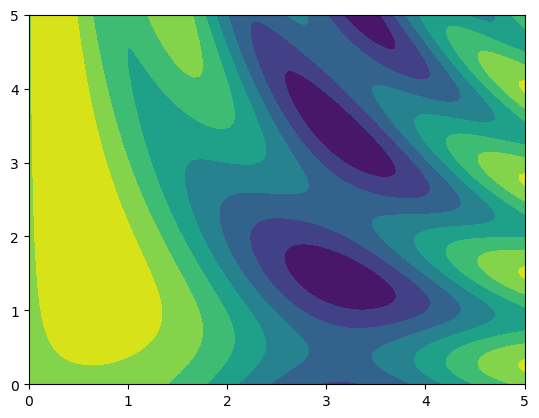

In [69]:
plt.contourf(X, Y, Z)
plt.show()

Los parámetros que acepta son los mismos que la función *contour*. Mostremos otra versión de la misma gráfica con 15 niveles y otro mapa de colores:

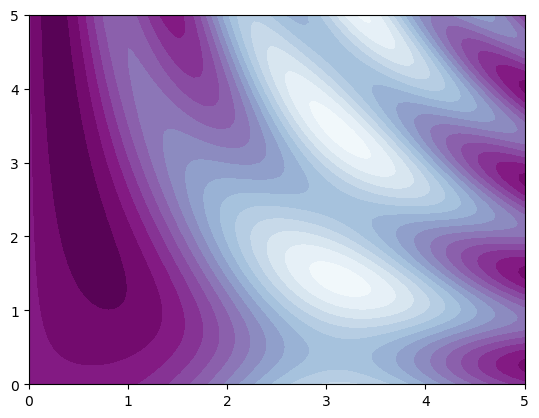

In [70]:
plt.contourf(X, Y, Z, levels = 15, cmap = "BuPu")
plt.show()

# Barras de color

Este tipo de gráficas pueden ir acompañadas de una barra de color que muestre los valores correspondientes a cada uno de los colores usados, lo que puede facilitar enormemente la interpretación del gráfico. La función que genera esta barra es [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html), y no necesita argumentos adicionales. Por el contrario, el método de una figura [colorbar](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar) requiere recibir como argumento el gráfico al que va asociado (véanse ejemplos más adelante).

Veamos un primer ejemplo creando una barra de color para una gráfica de curvas nivel creada con la función *plt.contour()*. Comenzamos recreando los valores $X$, $Y$ y $Z$:

In [71]:
def f(x, y):
    return np.sin(x) ** 2 + np.cos(5 + x * y) + x
    
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

A continuación, generamos la gráfica y añadimos la función *colorbar*:

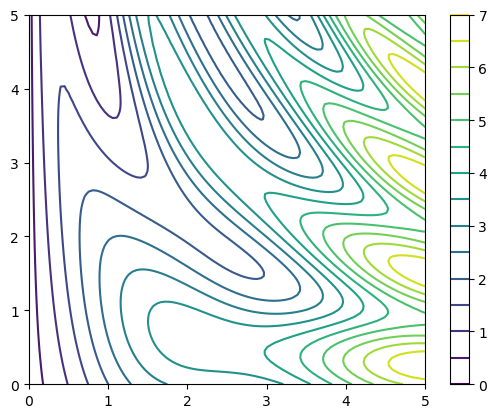

In [72]:
plt.contour(X, Y, Z, levels = 15)
plt.colorbar()
plt.show()

En el caso de asociarse la barra de color a una gráfica de curvas de nivel, la ayuda que supone es relativa. Pero si se asocia a una gráfica de curvas de nivel rellena, la mejora es sustancial. En el siguiente ejemplo se utiliza una de estas gráficas. En este caso vamos a usar el método *.colorbar()* asociado a la figura. Obsérvese que es necesario incluir como argumento una referencia a la gráfica generada:

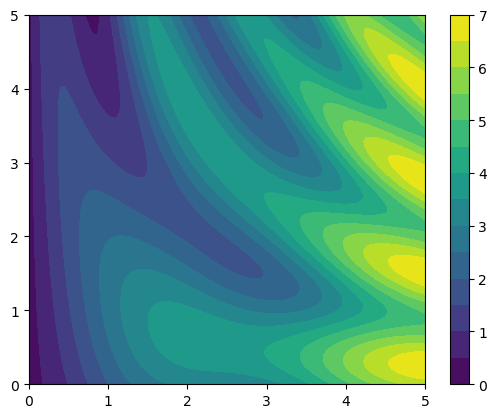

In [73]:
fig, ax = plt.subplots()
g = ax.contourf(X, Y, Z, levels = 15)
fig.colorbar(g)
plt.show()

La barra puede ser mostrada horizontalmente usando el parámetro **orientation** (en el siguiente ejemplo se usa el mapa de color *Reds*)

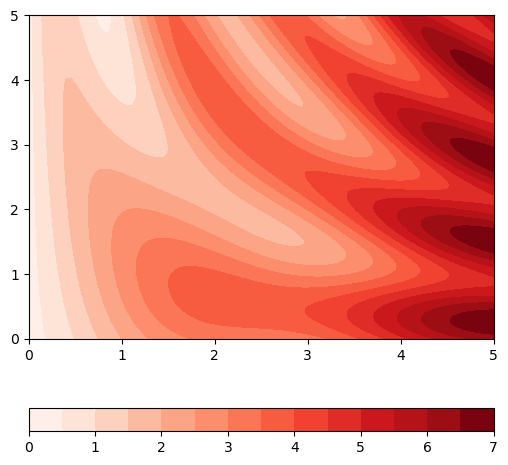

In [74]:
fig, ax = plt.subplots(figsize = (6, 6))
g = ax.contourf(X, Y, Z, levels = 15, cmap = "Reds")
fig.colorbar(g, orientation = "horizontal")
plt.show()

El parámetro **fraction** controla el porcentaje de la figura que se dedicará a la barra de color, y el parámetro **aspect** controla el aspecto de la barra (la proporción alto-ancho). Jugando con ambos valores podemos mostrar barras más anchas que cubran la altura completa de la figura:

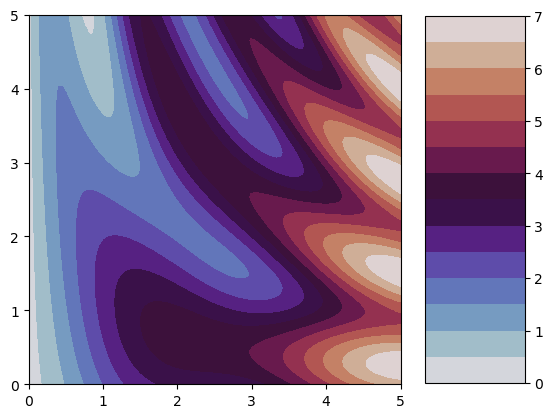

In [75]:
fig, ax = plt.subplots()
g = ax.contourf(X, Y, Z, levels = 15, cmap = "twilight")
fig.colorbar(g, aspect = 3.7, fraction = 0.20)
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>